# Exploratory Computing with Python

## Statistics Notebook 3: Distribution of the mean, hypothesis tests, and the central limit theorem

In this notebook we first investigate the distribution of the mean of a dataset, we simulate several hypothesis tests, and finish with exploring the central limit theorem. 

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import mpld3
mpld3.enable_notebook()

def axvline(val, **kwargs):
    ax = plt.gca()
    ylim = ax.get_ylim()
    return plt.plot([val, val], ylim, **kwargs)

plt.axvline = axvline

In [2]:
%load_ext rpy2.ipython

/opt/conda/lib/python3.6/site-packages/rpy2/ipython/rmagic.py:73: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))


In [3]:
%%R 
library(psych)
library(TeachingDemos)

Consider a dataset of 100 points. The data are drawn from a normal distribution with mean 4 and standard deviation 2. As we noticed before, the mean of the 100 data points (the sample mean) almost always differs from 4. And every time we generate a new set of 100 points, the mean will be somewhat different. 

In [4]:
@interact(N=(50, 150))
def generate(N):
    for i in range(5):
        a = 2 * np.random.standard_normal(N) + 4
        print('mean a: ', np.mean(a))

interactive(children=(IntSlider(value=100, description='N', max=150, min=50), Output()), _dom_classes=('widget…

In fact, the mean of the dataset itself can be considered as a random variable with a distribution of its own. 

###Sample standard deviation
The sample standard deviation $s_n$ of a dataset of $n$ values is defined as

$s_n = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$

and can be computed with the `std` function. By default, the `std` function devides the sum by $n$ rather than by $n-1$. To divide by $n-1$, as we want for an unbiased estimate of the standard deviation, specify the keyword argument `ddof=1` in the `std` function.

###Exercise 1. <a name="back1"></a>Histogram of the means of datasets with 100 values
Generate 1000 datasets each with 100 values drawn from a normal distribution with mean 4 and standard deviation 2; use a seed of 22. Compute the mean of each dataset and store them in an array of length 1000. Compute the mean of the means and the standard deviation of the means, and print them to the screen. Draw a boxplot of the means. In a separate figure, draw a histogram of the means and make sure the x-axis extends from 3 to 5. Recall that you can start a new figure with the `figure()` function. 

<a href="#ex1answer">Answers to Exercise 1</a>

###Exercise 2. <a name="back2"></a>Histogram of the means of datasets with 1000 values
Repeat exercise 1 but now generate 1000 datasets each with 1000 values (rather than 100 values) drawn from the same normal distribution with mean 4 and standard deviation 2, and again with a seed of 22. For the histogram, make sure again that the limits of the x-axis go from 3 to 5, so that the histogram can be compared to the histogram you created above. Is the spread of the mean much smaller now as compared to the the datasets consisting of only 100 values?

<a href="#ex2answer">Answers to Exercise 2</a>

###Sample standard deviation of the sample mean
The histogram of the means looks like the bell-shaped curve of a Normal distribution, but you may recall that it is actually a Student's $t$-distribution, also simply called the $t$-distribution. A $t$-distribution arises when estimating the mean of a normally distributed variable in situations where the sample size is relatively small and the standard deviation is unknown (as it pretty much always is in practice) and needs to be estimated from the data. 

The sample mean of a dataset of $n$ values is commonly written as $\overline{x}_n$, while the sample standard deviation is written as $s_n$ (as defined above). Here, we are computing the sample standard deviation of the sample means, which we write as $\hat{s}_n$ for a dataset of size $n$. Theoretically, the value of the standard deviation of the sample mean $\hat{s}_n$ is related to the sample standard deviation as (see Statistics book by Dekking et al. (2005), p. 182)

$\hat{s}_n = s_n / \sqrt{n}$

###Percentiles of $t$-distribution
You may recall that the 90% interval around the mean for a Normally distributed variable runs from $\mu-1.64\sigma$ to $\mu+1.64\sigma$. In other words, 5% of the data is expected to lie below $\mu-1.64\sigma$ and 5% of the data is expected to lie above $\mu+1.64\sigma$. What now if you forgot it is $1.64\sigma$ to the left and right of the mean? Or what if you want to know the value for some other percentile. You may look that up in a table in a Statistics book (or on the web), or use the percent point function `ppf`, which is part of any statistical distribution function defined in the `scipy.stats` package. The `ppf` function is the inverse of the cumulative distribution function. For example, `ppf(0.05)` returns the value of the data such that the cumulative distribution function is equal to 0.05 at the returned value. To find the 5% and 95% values, type (recall that by default the `norm` distribution has mean zero and standard deviation 1; you can specify different values with the `loc` and `scale` keyword arguments, respectively).

In [5]:
from scipy.stats import norm
xvalue_05 = norm.ppf(0.05)
xvalue_95 = norm.ppf(0.95)
print('5% limit: ', xvalue_05)
print('95% limit: ', xvalue_95)
print('check if it works for 5%:  ', norm.cdf(xvalue_05))
print('check if it works for 95%: ', norm.cdf(xvalue_95))
# Next, specify a mean and standard deviation
xvalue_05_musig = norm.ppf(0.05, loc=20, scale=10) # mu = 20, sigma = 10
print('5% limit with mu=20, sig=10: ', xvalue_05_musig)
print('check: ', norm.cdf(xvalue_05_musig, loc=20, scale=10))

5% limit:  -1.64485362695
95% limit:  1.64485362695
check if it works for 5%:   0.05
check if it works for 95%:  0.95
5% limit with mu=20, sig=10:  3.55146373049
check:  0.05


A similar function exists for the $t$ distribution. The $t$-distribution takes one additional argument: the number of degrees of freedom, which is equal to the number of data points minus 1. For example, consider a sample with 40 data points, a sample mean of 20, and a sample standard deviation of the mean of 2, then the 5 and 95 percentiles are

In [6]:
from scipy.stats import t
xvalue_05 = t.ppf(0.05, 39, loc=20, scale=2)
xvalue_95 = t.ppf(0.95, 39, loc=20, scale=2)
print('5% limit:  ', xvalue_05)
print('95% limit: ', xvalue_95)
print('check if it works for 5%:  ', t.cdf(xvalue_05, 39, loc=20, scale=2))
print('check if it works for 95%: ', t.cdf( xvalue_95, 39, loc=20, scale=2))

5% limit:   16.630249761
95% limit:  23.369750239
check if it works for 5%:   0.0500000002153
check if it works for 95%:  0.949999999785


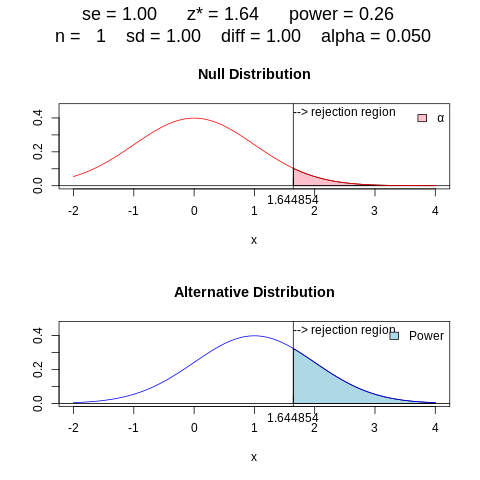

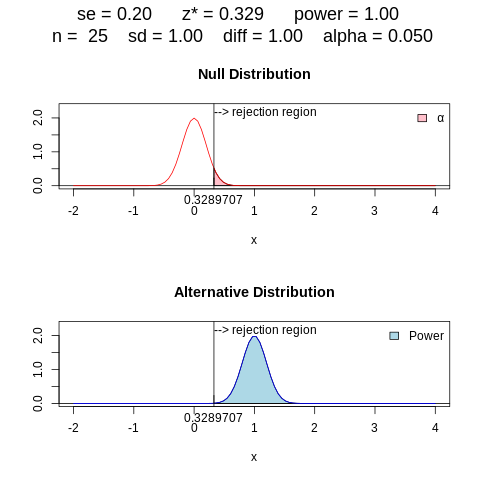

In [7]:
%%R
power.examp()
power.examp(n=25)

###Exercise 3. <a name="back3"></a>Count the number of means outside 95 percentile
Go back to Exercise 1. Generate 1000 datasets each with 100 values drawn from a normal distribution with mean 4 and standard deviation 2; use a seed of 22. For each dataset, evaluate whether the sample mean is within the 95 percentile of the $t$-distribution around the true mean of 4 (the standard deviation of the sample mean is different every time, of course). Count how many times the sample mean is so low that it is below the 5 percentile of the $t$ distribution around the true mean. If the theory is correct, it should, of course, be the case for about 5% of the datasets. Try a few different seeds.

<a href="#ex3answer">Answers to Exercise 3</a>

###Exercise 4. <a name="back4"></a>$t$ test on dataset of 20 values
Generate 20 datapoints from a Normal distribution with mean 40 and standard deviation 4. Use a seed of 70. Compute and report the mean and standard deviation of the dataset and the standard deviation of the mean.

If you computed it correctly, the mean of the 20 data points generated above is 38.99. Somebody now claims that the 20 datapoints are taken from a distribution with a mean of 40. You are asked to decide wether the true underlying mean could indeed be 40. In statistical terms, you are asked to perform a Hypothesis test, testing the null hypothesis that the mean is 40 against the alternative hypothesis that the mean is not 40 at significance level 5%. Hence, you are asked to do a two-sided $t$-test. All you can do in Hypothesis testing it trying to reject the null hypothesis, so let's try that. Most statistics books give a cookbook recipe for performing a $t$-test. Here we will visualize the $t$-test. We reject the null hypothesis if the sample mean is outside the 95% interval around the mean of the corresponding $t$-distribution. If the mean is inside the 95% interval we can only conclude that there is not enough evidence to reject the null hypothesis. Draw the probability density function of a $t$-distribution with mean 40 and standard deviation equal to the standard deviation of the sample mean you computed above. Draw red vertical lines indicating the left and right limits of the 95% interval around the mean. Draw a heavy black vertical line at the position of the sample mean you computed above. Decide whether you can reject the null hypothesis that the mean is 40 and add that as a title to the figure.

<a href="#ex4answer">Answers to Exercise 4</a>

###Exercise 5. <a name="back5"></a>Hypothesis tests on Peterson-Barney data
Load the data set of experiments on vowel acoustics stored in the file `../data/verified_pb.data`. First, consider the first 20 measurements of F0 of male speakers. Compute the sample mean and the standard deviation of the sample mean. Someone claims that the mean F0 is only 130 Hz. Perform a $t$-test (significance level 5%) with null hypothesis that the mean is indeed 130 Hz and alternative hypothesis that the mean is not 130 Hz using the approach applied in Exercise 4.

Repeat the $t$-test above but now with all the measurements of the F0. Do you reach the same conclusion?

<a href="#ex5answer">Answers to Exercise 5</a>

###Central limit theorem
So far we looked at the distribution of the sample mean of a dataset while we knew that the data was taken from a normal distribution (except for the F0 data, but that looked very much like a Normal distribution). Such a sample mean has a Student $t$-distribtion, which approaches the Normal distribution when the dataset is large. Actually, 100 datapoints is already enough to approach the Normal distribution fairly closely. You may check this by comparing, for example, the percent point function `ppf` of a Normal distribution with a $t$-distribution with 99 degrees of freedom, or by simply plotting the pdf of both distributions:

In [8]:
@interact(N=(10, 100))
def plot_overlap(N):
    from scipy.stats import norm
    print('95 percentile Standard Normal:  ', norm.ppf(0.95))
    print('95 percentile t-dist with n=99: ', t.ppf(0.95, N - 1))
    x = np.linspace(-4, 4, 100)
    y1 = norm.pdf(x)
    y2 = t.pdf(x, N - 1)
    plt.plot(x, y1, 'b', label='Normal')
    plt.plot(x, y2, 'r', label='t-dist')
    ph = plt.legend()

interactive(children=(IntSlider(value=55, description='N', min=10), Output()), _dom_classes=('widget-interact'…

The Central limit theorem now states that the distribution of the sample mean approaches the Normal distribution in the limit even if the dataset is drawn from an entirely different distribution! We are going to test this theorem by drawing numbers from a Gamma distribution. The Gamma distribution is a skewed distribution and takes a shape parameter $k$ and a scale parameter $\theta$, and is defined for $x>0$. Details on the Gamma distribution can be found, for example, <a href="http://en.wikipedia.org/wiki/Gamma_distribution" target="_blank"> here</a>. Let's choose the shape parameter equal to 2 and the scale parameter equal to 1 (the default, so we don't have to specify it). When the scale parameter is equal to 1, the mean is equal to the shape parameter. The pdf of the Gamma distribution for these values is shown below. The mean is indicated with the red vertical line.

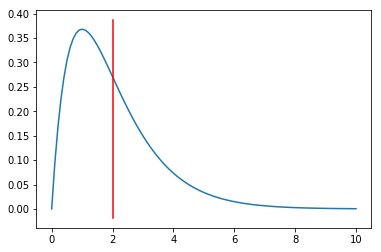

In [9]:
from scipy.stats import gamma
x = np.linspace(1e-6, 10, 100)
y = gamma.pdf(x, 2)
plt.plot(x,y)
plt.axvline(2, color='r');

Random numbers may be drawn from any distribution in the `scipy.stats` package with the `rvs` function. Here, we draw 1000 numbers and add the histogram to the previous figure

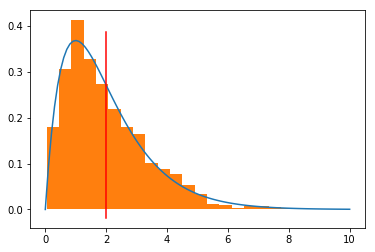

In [10]:
x = np.linspace(1e-6, 10, 100)
y = gamma.pdf(x, 2)
plt.plot(x, y)
plt. axvline(2,color='r')
data = gamma.rvs(2, size=1000)
hh = plt.hist(data, bins=20, density=True)

###Exercise 6. <a name="back6"></a>Explore Central Limit Theorem for Gamma Distribution
Generate $N$ datasets of 20 numbers randomly drawn from a Gamma distribution with shape parameter equal to 2 and scale equal to 1. Draw a histogram of the means of the $N$ datasets using 20 bins. On the same graph, draw the pdf of the Normal distribution using the mean of means and sample standard deviation of the mean; choose the limits of the $x$-axis between 0 and 4. Make 3 graphs, for $N$=100,1000,10000 and notice that the distribution starts to approach a Normal distribution. Add a title to each graph stating the number of datasets.

<a href="#ex6answer">Answers to Exercise 6</a>

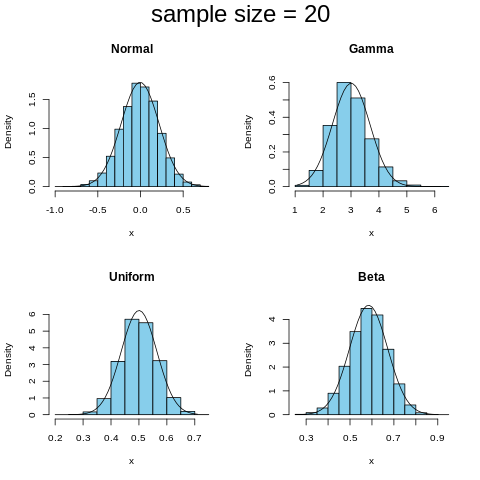

In [11]:
%R -n clt.examp(20)

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

The mean of the means is:  4.00474211854
The standard deviation of the means is:  0.190485481767


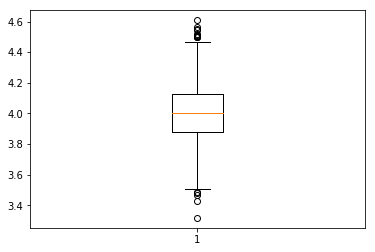

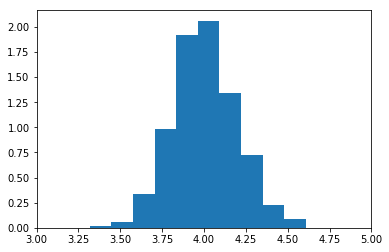

In [12]:
np.random.seed(22)
mean_of_data = np.mean( 2.0 * np.random.standard_normal((1000, 100)) + 4.0, axis=1 )
print('The mean of the means is: ', np.mean(mean_of_data))
print('The standard deviation of the means is: ', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.figure()
plt.hist(mean_of_data, density=True)
plt.xlim(3,5);

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

The mean of the means is:  4.00128131235
The standard deviation of the means is:  0.0654148250988


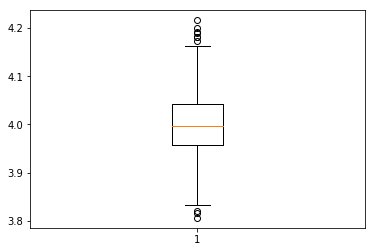

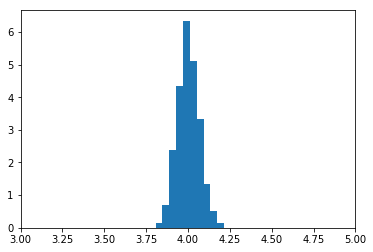

In [13]:
np.random.seed(22)
mean_of_data = np.mean( 2.0 * np.random.standard_normal((1000, 1000)) + 4.0, axis=1 )
print('The mean of the means is: ', np.mean(mean_of_data))
print('The standard deviation of the means is: ', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.figure()
plt.hist(mean_of_data, density=True)
plt.xlim(3,5);

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [14]:
from scipy.stats import t
for s in [22, 32, 42, 52, 62]:
    np.random.seed(s)
    data = 2.0 * np.random.standard_normal((1000, 100)) + 4.0
    mean_of_data = np.mean(data, axis=1)
    std_of_mean_of_data = np.std(data, 1, ddof=1) / np.sqrt(100)
    fivepercentile = t.ppf(0.95, 99)
    outside = mean_of_data > 4.0 + std_of_mean_of_data * fivepercentile
    print('number of datasets where sample mean is above 95 percentile: ', np.sum(outside))
    print('fraction of datasets where sample mean is above 95 percentile: ', np.sum(outside)/1000.)

number of datasets where sample mean is above 95 percentile:  53
fraction of datasets where sample mean is above 95 percentile:  0.053
number of datasets where sample mean is above 95 percentile:  56
fraction of datasets where sample mean is above 95 percentile:  0.056
number of datasets where sample mean is above 95 percentile:  56
fraction of datasets where sample mean is above 95 percentile:  0.056
number of datasets where sample mean is above 95 percentile:  49
fraction of datasets where sample mean is above 95 percentile:  0.049
number of datasets where sample mean is above 95 percentile:  66
fraction of datasets where sample mean is above 95 percentile:  0.066


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

In [15]:
np.random.seed(70)
data = 4 * np.random.standard_normal(20) + 40
mu = np.mean(data)
sig = np.std(data,ddof=1)
sighat = np.std(data, ddof=1) / np.sqrt(20)
print('mean of the data: ', mu)
print('std of the data: ', sig)
print('std error of the mean: ', sighat)

mean of the data:  38.9858312959
std of the data:  4.06955104558
std error of the mean:  0.909979277582


38.095391483 41.904608517


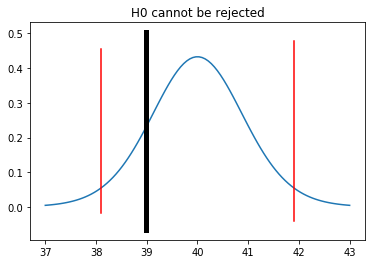

In [16]:
x = np.linspace(37,43,100)
y = t.pdf(x, 19, loc=40, scale=sighat)
plt.plot(x, y)
perc025 = t.ppf(0.025, 19, loc=40, scale=sighat)
perc975 = t.ppf(0.975, 19, loc=40, scale=sighat)
print(perc025, perc975)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu, color='k', lw=5)
plt.title('H0 cannot be rejected');

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

sample mean, standard deviation of sample mean:  165.85 3.82600176081


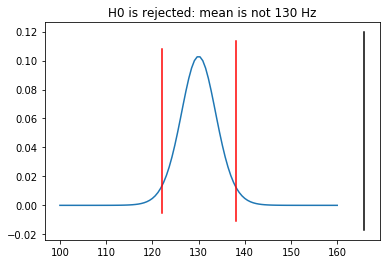

In [17]:
import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])
F0 = data.F0[data.gender == 1]
mu20 = np.mean(F0[:20])
sig20 = np.std(F0[:20], ddof=1) / np.sqrt(20)
print('sample mean, standard deviation of sample mean: ', mu20, sig20)
x = np.linspace(100, 160, 100)
y = t.pdf(x, 19, loc=130, scale=sig20)
plt.plot(x, y)
perc025 = t.ppf(0.025, 19, loc=130, scale=sig20)
perc975 = t.ppf(0.975, 19, loc=130, scale=sig20)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu20, color='k')
plt.title('H0 is rejected: mean is not 130 Hz');

sample mean, standard deviation of sample mean:  131.26969697 0.738769932614
128.549373304 131.450626696


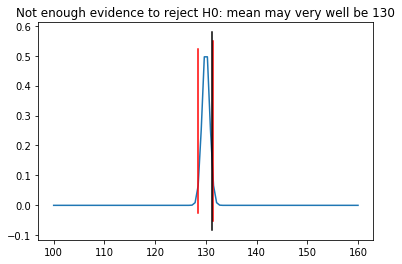

In [18]:
import pandas as pd
data = pd.read_table('../data/verified_pb.data', names=['gender', 'speaker', 'pid', 'phoneme', 'F0', 'F1', 'F2', 'F3'])
F0 = data.F0[data.gender == 1]
N = len(F0)
mu20 = np.mean(F0)
sig20 = np.std(F0, ddof=1) / np.sqrt(N)
print('sample mean, standard deviation of sample mean: ', mu20, sig20)
x = np.linspace(100, 160, 100)
y = t.pdf(x, N-1, loc=130, scale=sig20)
plt.plot(x, y)
perc025 = t.ppf(0.025, N-1, loc=130, scale=sig20)
perc975 = t.ppf(0.975, N-1, loc=130, scale=sig20)
print(perc025, perc975)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu20, color='k')
plt.title('Not enough evidence to reject H0: mean may very well be 130');

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

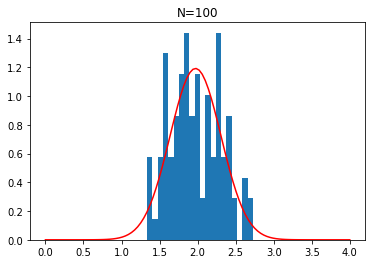

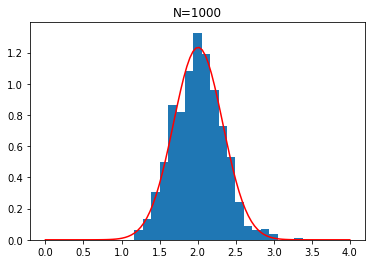

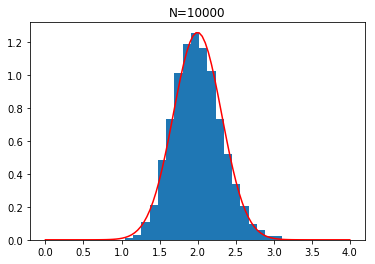

In [19]:
from scipy.stats import norm, gamma
for N in [100, 1000, 10000]:
    data = gamma.rvs(2, size=(N, 20))
    mean_of_data = np.mean(data, axis=1)
    mu = np.mean(mean_of_data)
    sig = np.std(mean_of_data, ddof=1)
    plt.figure()
    plt.hist(mean_of_data, bins=20, density=True)
    x = np.linspace(0, 4, 100)
    y = norm.pdf(x, loc=mu, scale=sig)
    plt.plot(x, y, 'r')
    plt.title('N='+str(N));

<a href="#back6">Back to Exercise 6</a>